## İLERİ SEVİYE MÜŞTERİ SEGMENTASYONU PROJESİ

Bu projemizde Massachusetts Institute of Technology (MIT) tarafından geliştirilmiş ileri seviye bir kütüphane kullanacağız.

In [2]:
# Verilerimiz komplex olduğu için burada K-Means kullanamıyoruz.
import pandas as pd
import numpy as np

In [4]:
!pip install kmodes

  Obtaining dependency information for kmodes from https://files.pythonhosted.org/packages/1a/a8/0d3bf6f3340cbcb8cf4ad02c306d157af8f09ce86aadf5346e00605870dd/kmodes-0.12.2-py2.py3-none-any.whl.metadata


In [5]:
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt
# kmodes kütüphanesi standart distribution içinde gelmez sizin install etmeniz gerekebilir.
# Massachusetts Institute of Technology (MIT) tarafından geliştirilmiş ileri seviye bir kütüphanedir.
# https://anaconda.org/conda-forge/kmodes linkinde detay mevcuttur
# conda install -c conda-forge kmodes   komutu ile Anaconda üzerinde kurabilirsiniz..
from kmodes.kprototypes import KPrototypes  
from kmodes.kmodes import KModes

In [7]:
#veri setimizi import edelim 
df = pd.read_csv("segmentation_data.csv")
df.head()

,ID,Sex,Marital status,Age,Education,Income,Occupation,Settlement size
0,100000001,0,0,67,2,124670,1,2
1,100000002,1,1,22,1,150773,1,2
2,100000003,0,0,49,1,89210,0,0
3,100000004,0,0,45,1,171565,1,1
4,100000005,0,0,53,1,149031,1,1


In [8]:
df.tail()

,ID,Sex,Marital status,Age,Education,Income,Occupation,Settlement size
1995,100001996,1,0,47,1,123525,0,0
1996,100001997,1,1,27,1,117744,1,0
1997,100001998,0,0,31,0,86400,0,0
1998,100001999,1,1,24,1,97968,0,0
1999,100002000,0,0,25,0,68416,0,0


In [9]:
df.isnull().sum()

ID                 0
Sex                0
Marital status     0
Age                0
Education          0
Income             0
Occupation         0
Settlement size    0
dtype: int64

In [10]:
df_temp = df[['ID','Age', 'Income']]
df_temp

,ID,Age,Income
0,100000001,67,124670
1,100000002,22,150773
2,100000003,49,89210
3,100000004,45,171565
4,100000005,53,149031
...,...,...,...
1995,100001996,47,123525
1996,100001997,27,117744
1997,100001998,31,86400
1998,100001999,24,97968


In [13]:
sc = StandardScaler()

sc.fit(df[['Age']])
df['Age'] = sc.transform(df[['Age']]) 

sc.fit(df[['Income']])
df['Income'] = sc.transform(df[['Income']])

In [15]:
# Drop ID before analysis..
# Since ID is not used in analysis...
df = df.drop(['ID'],axis=1)

In [16]:
mark_array= df.values

mark_array[:, 2] = mark_array[:, 2].astype(float)
mark_array[:, 4] = mark_array[:, 4].astype(float)

In [17]:
df.head()

,Sex,Marital status,Age,Education,Income,Occupation,Settlement size
0,0,0,2.653614,2,0.097524,1,2
1,1,1,-1.187132,1,0.782654,1,2
2,0,0,1.117316,1,-0.833202,0,0
3,0,0,0.775916,1,1.328386,1,1
4,0,0,1.458716,1,0.736932,1,1


In [ ]:
# Build our model...
model = KPrototypes(n_clusters=10, verbose=2, max_iter=20)
clusters = model.fit_predict(mark_array, categorical=[0, 1, 3, 5, 6])

Initialization method and algorithm are deterministic. Setting n_init to 1.
Init: initializing centroids
Init: initializing clusters
Starting iterations...
Run: 1, iteration: 1/20, moves: 664, ncost: 2165.7551862452547
Run: 1, iteration: 2/20, moves: 246, ncost: 2090.1281972812762
Run: 1, iteration: 3/20, moves: 76, ncost: 2085.2149056064436
Run: 1, iteration: 4/20, moves: 11, ncost: 2084.989816517358
Run: 1, iteration: 5/20, moves: 9, ncost: 2084.69356911335
Run: 1, iteration: 6/20, moves: 8, ncost: 2084.4518296591837
Run: 1, iteration: 7/20, moves: 5, ncost: 2084.3617690057413
Run: 1, iteration: 8/20, moves: 1, ncost: 2084.358522179331
Run: 1, iteration: 9/20, moves: 0, ncost: 2084.358522179331
Init: initializing centroids
Init: initializing clusters
Starting iterations...
Run: 2, iteration: 1/20, moves: 724, ncost: 1949.582686076987
Run: 2, iteration: 2/20, moves: 166, ncost: 1938.6733723240118
Run: 2, iteration: 3/20, moves: 41, ncost: 1933.7329205306237
Run: 2, iteration: 4/20, mo

In [20]:
print(model.cluster_centroids_)

print("uzunluk: ", len(model.cluster_centroids_))

[[ 0.21336346 -0.81944922  0.          0.          1.          0.
   0.        ]
 [-0.29444704  0.97180048  1.          1.          1.          1.
   1.        ]
 [-0.64214293 -0.20493471  1.          1.          1.          1.
   0.        ]
 [ 0.46049252  2.76390745  0.          0.          1.          2.
   2.        ]
 [-0.7703455  -1.20487766  1.          1.          1.          0.
   0.        ]
 [ 2.1727118   0.94247523  0.          0.          2.          1.
   1.        ]
 [-0.65412181  0.05480235  0.          0.          0.          1.
   1.        ]
 [ 0.52919724  0.2934308   0.          0.          1.          1.
   2.        ]
 [-0.85247054 -0.32527643  1.          1.          1.          1.
   1.        ]
 [ 1.34822378 -0.35285542  1.          1.          2.          0.
   0.        ]]
uzunluk:  10


In [21]:
cluster_dict=[]
for c in clusters:
    cluster_dict.append(c)

df['cluster']=cluster_dict

# Put original columns from temp to df:
df[['ID','Age', 'Income']] = df_temp

In [22]:
df[df['cluster']== 0].head(10)

,Sex,Marital status,Age,Education,Income,Occupation,Settlement size,cluster,ID
2,0,0,49,1,89210,0,0,0,100000003
22,0,0,48,1,89804,0,0,0,100000023
25,0,0,36,1,71909,0,0,0,100000026
26,0,1,39,1,68264,0,0,0,100000027
50,0,0,29,0,84531,0,0,0,100000051
71,0,0,46,1,73703,0,0,0,100000072
84,0,0,52,1,93706,0,0,0,100000085
100,0,1,41,1,93372,0,0,0,100000101
126,0,1,40,1,71702,0,0,0,100000127
157,0,1,45,2,72215,0,0,0,100000158


In [23]:
df1 = df[df.cluster==0]
df2 = df[df.cluster==1]
df3 = df[df.cluster==2]
df4 = df[df.cluster==3]
df5 = df[df.cluster==4]
df6 = df[df.cluster==6]
df7 = df[df.cluster==7]
df8 = df[df.cluster==8]
df9 = df[df.cluster==9]
df10 = df[df.cluster==10]

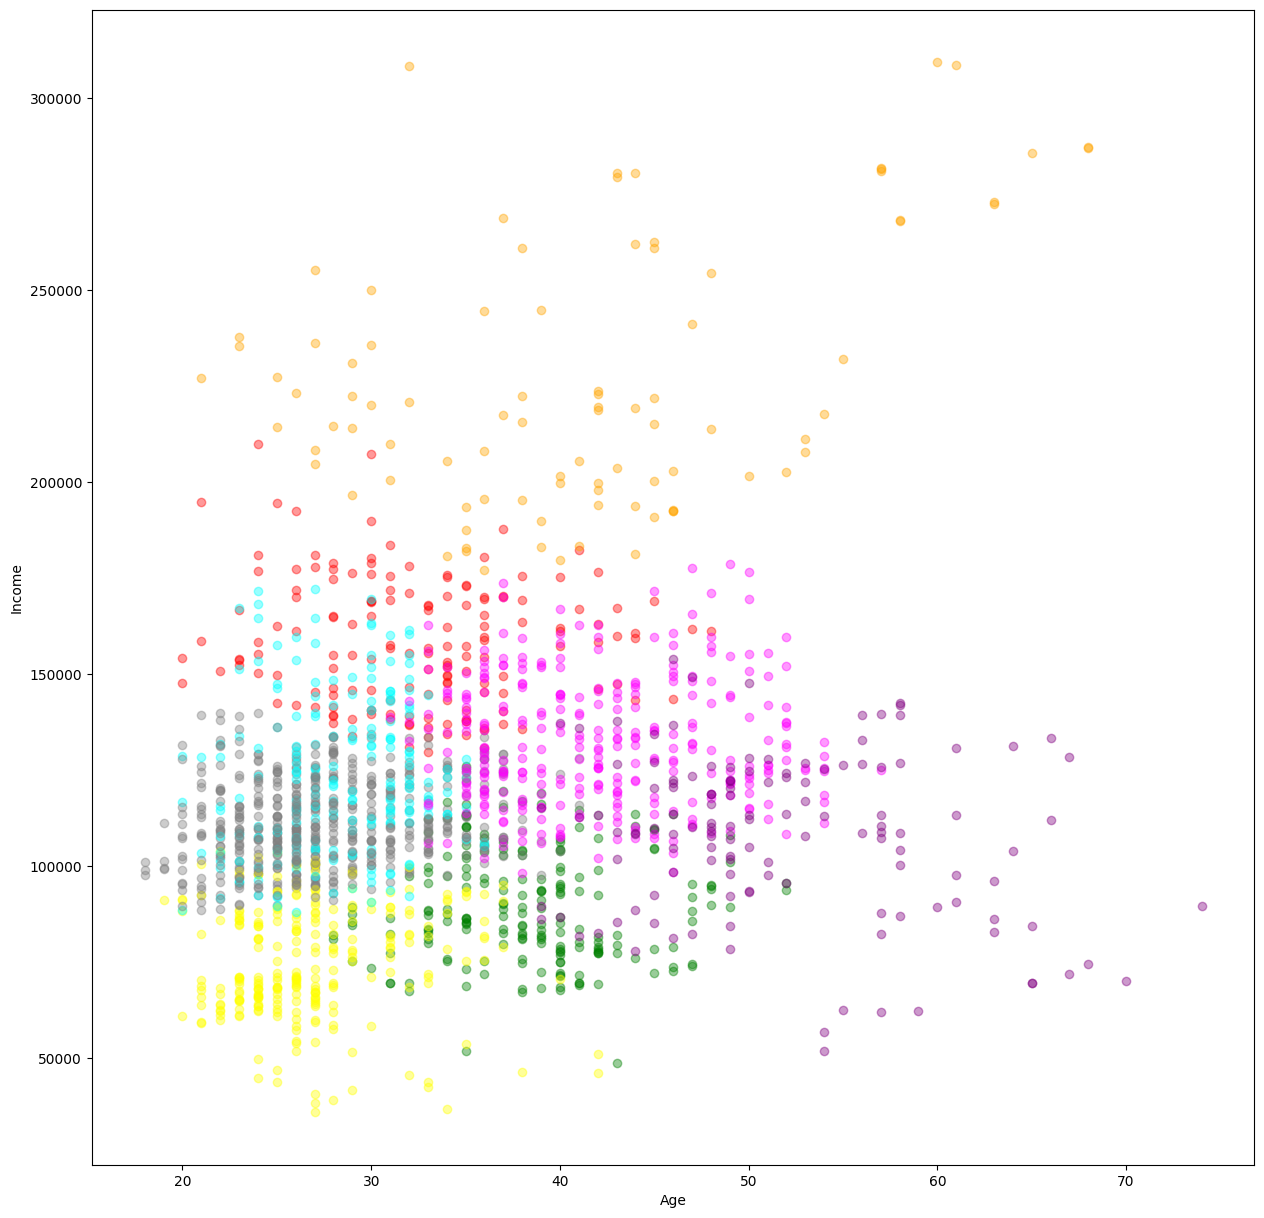

In [25]:
plt.figure(figsize=(15,15))
plt.xlabel('Age')
plt.ylabel('Income')

plt.scatter(df1.Age, df1['Income'],color='green', alpha = 0.4)
plt.scatter(df2.Age, df2['Income'],color='red', alpha = 0.4)
plt.scatter(df3.Age, df3['Income'],color='gray', alpha = 0.4)
plt.scatter(df4.Age, df4['Income'],color='orange', alpha = 0.4)
plt.scatter(df5.Age, df5['Income'],color='yellow', alpha = 0.4)
plt.scatter(df6.Age, df6['Income'],color='cyan', alpha = 0.4)
plt.scatter(df7.Age, df7['Income'],color='magenta', alpha = 0.4)
plt.scatter(df8.Age, df8['Income'],color='gray', alpha = 0.4)
plt.scatter(df9.Age, df9['Income'],color='purple', alpha = 0.4)
plt.scatter(df10.Age, df10['Income'],color='blue', alpha = 0.4)

# kmeans_modelim.cluster_centers_ numpy 2 boyutlu array olduğu için x ve y sütunlarını kmeans_modelim.cluster_centers_[:,0] 
# ve kmeans_modelim.cluster_centers_[:,1] şeklinde scatter plot için alıyoruz:
#plt.scatter(kmeans_modelim.cluster_centers_[:,0], kmeans_modelim.cluster_centers_[:,1], color='blue', marker='X', label='centroid')
plt.legend()
plt.show()